In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('social.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [50]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [4]:
df=df.drop(columns='User ID')

In [5]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
X=df.drop(columns='Purchased')

In [7]:
y=df['Purchased']

In [8]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [10]:
X.shape,y.shape

((400, 3), (400,))

<Axes: xlabel='count', ylabel='Gender'>

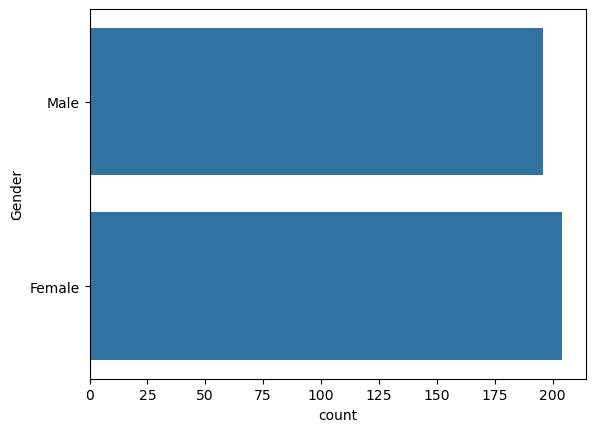

In [12]:
import seaborn as sns
sns.countplot(X['Gender'])

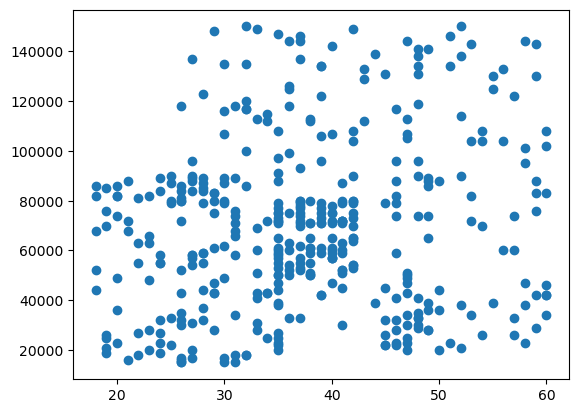

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X['Age'],X['EstimatedSalary'])

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [22]:
X_train

,Gender,Age,EstimatedSalary
259,Female,45,131000
43,Male,30,15000
110,Female,39,71000
138,Female,28,59000
41,Female,33,51000
...,...,...,...
75,Male,34,112000
201,Male,49,74000
292,Male,55,39000
291,Male,49,89000


In [23]:
y_test

111    0
352    1
85     1
194    0
180    0
      ..
202    1
23     1
333    0
322    0
36     0
Name: Purchased, Length: 120, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [25]:
X_train.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
dtype: int64

In [26]:
y_train.isnull().sum()

np.int64(0)

In [27]:
scaler=Pipeline([
    ('scaling',StandardScaler())
])

In [28]:
encoder=Pipeline([
    ('encoding',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

In [29]:
from sklearn.compose import ColumnTransformer

In [33]:
trf=ColumnTransformer([
    ('scaling',scaler,['Age','EstimatedSalary']),
    ('encoding',encoder,['Gender'])
],remainder='passthrough')

In [34]:
pipe=Pipeline([
    ('preprocessing', trf),
    ('model',RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        class_weight='balanced'
    ))
])

In [35]:
pipe.fit(X_train,y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaling', ...), ('encoding', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
y_pred=pipe.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix

In [39]:
print(accuracy_score(y_test,y_pred))

0.875


In [42]:
pipe_lr=Pipeline([
    ('trf',trf),
    ('model_lr',LogisticRegression(max_iter=1000))
])

In [43]:
pipe_lr.fit(X_train,y_train)

,steps,"[('trf', ...), ('model_lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaling', ...), ('encoding', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [44]:
y_pred_lr=pipe_lr.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred_lr)

0.8416666666666667

In [48]:
import pickle
pickle.dump(pipe,open('model.pkl','wb'))